In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
sns.set()

warnings.filterwarnings('ignore')

In [2]:
ausBeerProdData = pd.read_csv('/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/dataset/aus_beer_data.csv',parse_dates=True,index_col='Month')

In [3]:
ausBeerProdData.shape

(476, 1)

In [4]:
ausBeerProdData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [5]:
ausBeerProdData.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [7]:
#set the frequency
ausBeerProdData.index.freq = 'MS'

<AxesSubplot:xlabel='Month'>

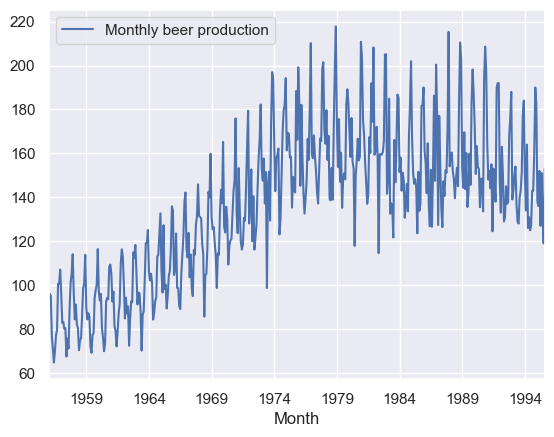

In [8]:
ausBeerProdData.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [20]:
adfuller(ausBeerProdData)

(-2.2826614187875807,
 0.17762099829132377,
 17,
 458,
 {'1%': -3.4447087976702284,
  '5%': -2.867871300049488,
  '10%': -2.5701423432047443},
 3463.9034375936567)

In [21]:
#getting the p-value by 1st order difference and removing the null values
#after that we are getting the p_value less than 0.05 so we can reject the H0
adfuller(ausBeerProdData.diff(1).dropna())[1].round(3)

0.0

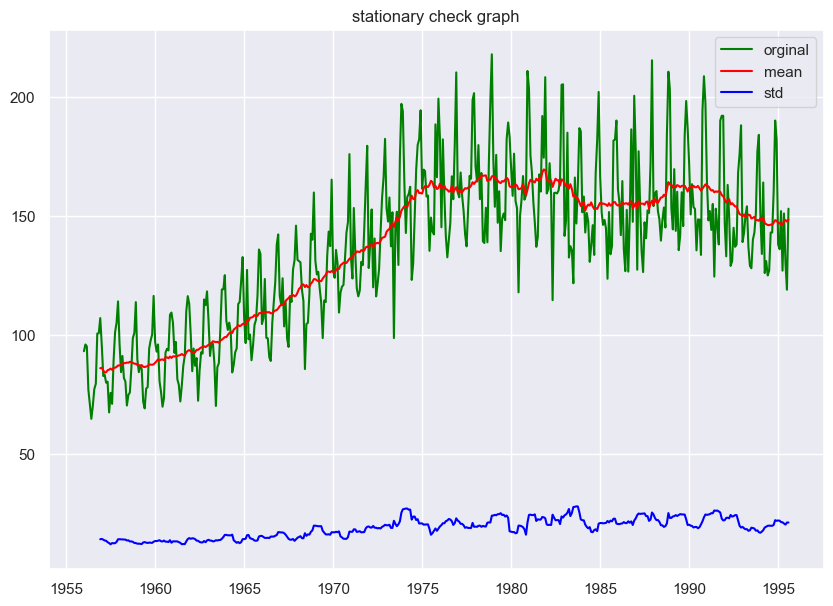

In [24]:
#now by visualisation technique
#from the graph we can see the data is not stationary
rollMean = ausBeerProdData.rolling(window=12).mean()
rollStd = ausBeerProdData.rolling(window=12).std()
plt.figure(figsize=(10,7))
plt.plot(ausBeerProdData,color='green',label = 'orginal')
plt.plot(rollMean,color='red', label = 'mean')
plt.plot(rollStd,color='blue', label ='std')
plt.legend()
plt.title('stationary check graph')
plt.show()